# KLASIFIKACIJA 
## koriscenjem nekoliko algoritama

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score, confusion_matrix

## Ucitavanje i pretprocesiranje podataka

In [2]:
sirovi_podaci = pd.read_csv('../drug_consumption.data')
sirovi_podaci #fale imena atributa

#procitano sa sajtu podataka 
kolone = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", 
            "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS", 
            "Alchocol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstasy", 
            "Heroin", "Ketamin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

sirovi_podaci = pd.read_csv('../drug_consumption.data', names = kolone)

podaci = sirovi_podaci.copy()

#ID mi ne igra nikakvu ulogu svakako
podaci = podaci.drop('ID', axis = 1)

podaci = podaci.drop('Semer', axis = 1)


In [3]:
podaci
print(f'Broj istanci: {podaci.shape[0]}')
print(f'Broj atributa: {podaci.shape[1]}')
podaci.describe()

Broj istanci: 1885
Broj atributa: 30


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [4]:
# posto imamo vise klasa koje ispitujemo, razdvajam podatke na atribute i na klase
podaci.head()

#izdvajanje atributa
atributi1 = podaci.columns
atributi1

atributi = []
for atribut in atributi1:
    if atribut == 'Alchocol':
        break
    atributi.append(atribut)
    
print(atributi, end = ', ')

['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS'], 

In [5]:
#izdvajanje klasa
klase = []
for atribut in atributi1:
    if atribut not in atributi:
        klase.append(atribut)
        
print(klase, end = ', ')
print()

# provera deljenja kolona
print(len(klase) + len(atributi) == len(podaci.columns))

['Alchocol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA'], 
True


In [6]:
# podaci bez klasa
podaci_bez_klasa = podaci.copy()
for x in klase:
    podaci_bez_klasa = podaci_bez_klasa.drop(x, axis = 1)
# podaci_bez_klasa = podaci_bez_klasa.drop('Semer', axis = 1)

In [7]:
#skaliramo podatke
def skaliraj_podatke(X):
    return (X - min(X))/(max(X) - min(X))

In [8]:
# skalirani_podaci = podaci.copy()
# for a in atributi:
#     skalirani_podaci[a] = skaliraj_podatke(skalirani_podaci[a])
    
# #provera uspesnosti skaliranja
# for a in atributi:
#     print(len(skalirani_podaci[a].unique()) == len(podaci[a].unique()), end = ", ")
    
# #nismo izgubili podatke
# podaci_skalirano = skalirani_podaci.copy()

In [9]:
podaci_bez_klasa

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [10]:
klase

['Alchocol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Canabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamin',
 'LegalH',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'VSA']

In [11]:
podaci_svi = podaci.copy()

def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7


In [12]:
for klasa in klase:
    podaci_svi[klasa] = podaci[klasa].apply(drug_encoder)

<AxesSubplot:>

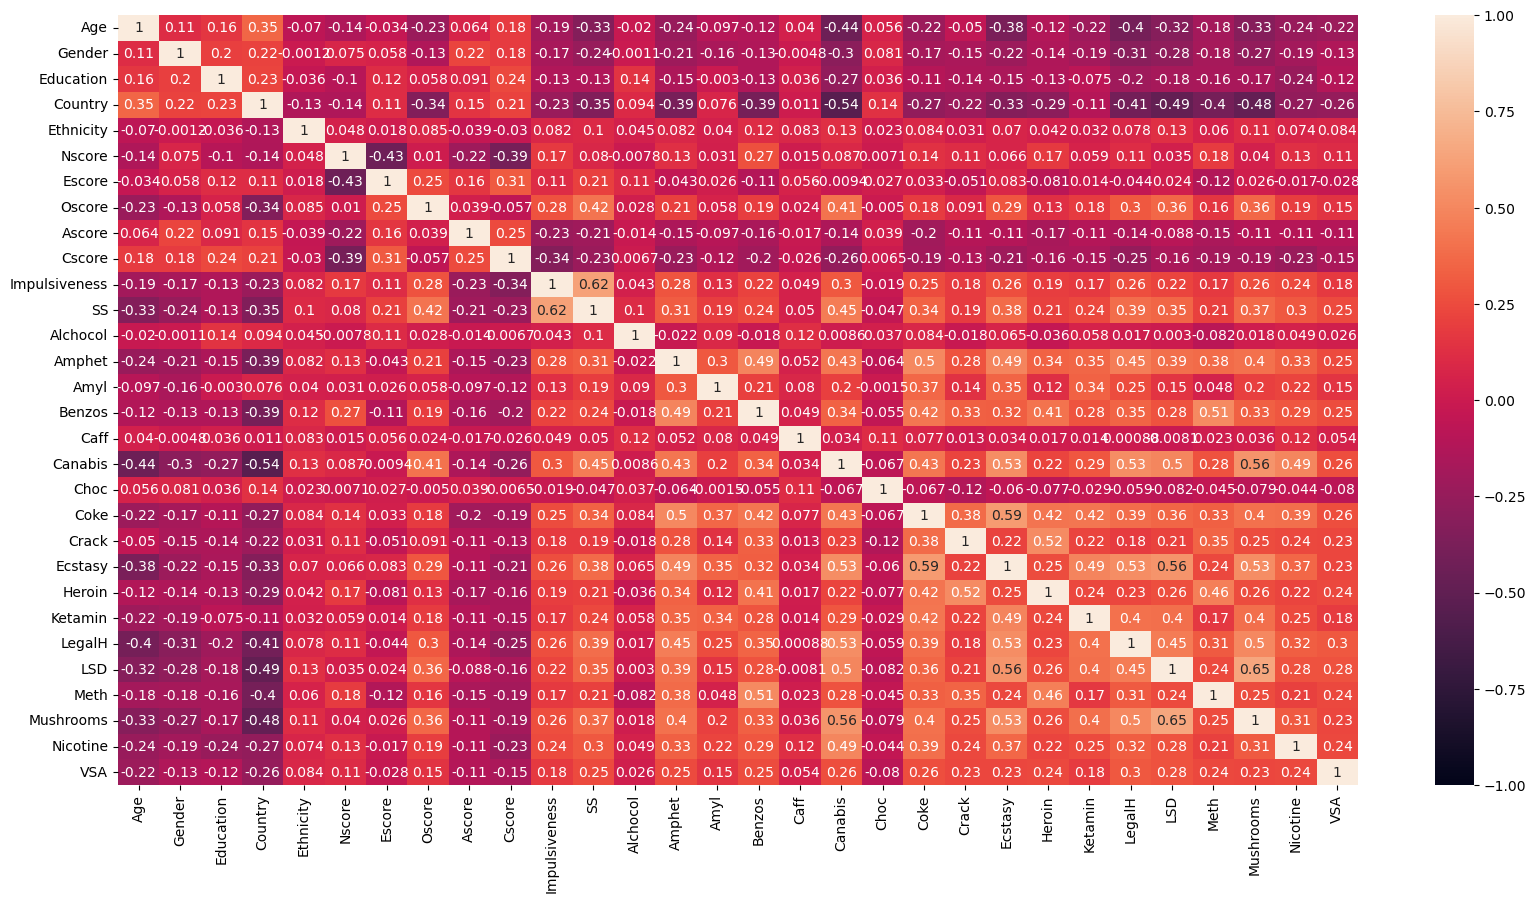

In [17]:
corr = podaci_svi.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

odbacujem podatke koje imaju los stepen korelacije kako mi ne bi smetali

In [13]:
podaci_spec = podaci_svi.copy()
niska_korelacija = ['Age', 'Gender', 'Education', 'Alchocol','Ascore','Caff']
for column in niska_korelacija:
    podaci_spec = podaci_spec.drop(column, axis=1)
podaci_spec.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsiveness,SS,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamin,LegalH,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,2,0,...,0,0,0,0,0,0,0,0,2,0
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,...,0,4,0,2,0,2,3,0,4,0
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,0,0,...,0,0,0,2,0,0,0,0,2,0
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,1,1,...,0,1,0,0,1,0,0,2,2,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [15]:
def nacrtaj_matricu_konfuzije(y, y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']); ax.yaxis.set_ticklabels(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6'])

In [16]:
# podaci_svi

In [17]:
# podaci_bez_klasa

pripremam podatke

In [18]:
X, y = podaci_spec, podaci_svi['Coke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42) 
for a in podaci_spec.columns:
        X_train[a] = skaliraj_podatke(X_train[a])
        X_test[a] = skaliraj_podatke(X_test[a])


In [22]:
LR = LogisticRegression()
SVM = SVC()
Suma = RandomForestClassifier()

modeli = [LR, SVM, Suma]

In [23]:
for model in modeli:
    model.fit(X_train, y_train)

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ocene nekih modela

In [24]:
for model in modeli:
    ykapa = model.predict(X_test)
    acc = accuracy_score(y_test, ykapa)
    print(f'Accuracy {model}: {acc}')

Accuracy LogisticRegression(): 0.7526501766784452
Accuracy SVC(): 0.8286219081272085
Accuracy RandomForestClassifier(): 0.9452296819787986


## Logisticka regresija

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


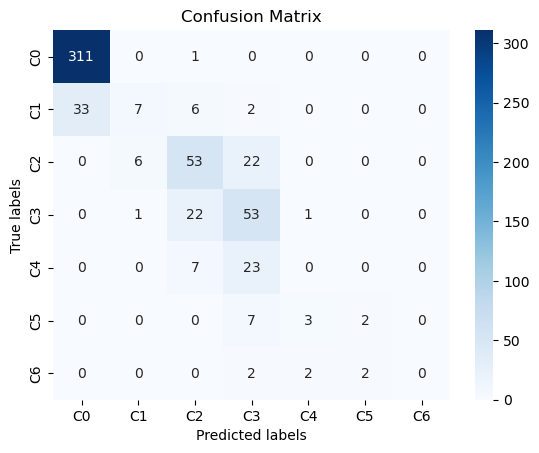

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
nacrtaj_matricu_konfuzije(y_test, yhat)

## SVM

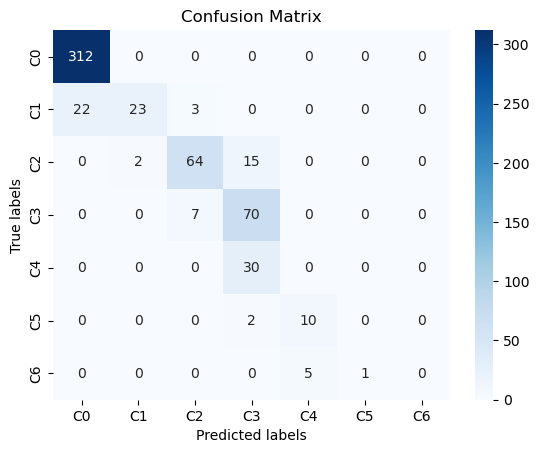

In [25]:
model = SVC()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
nacrtaj_matricu_konfuzije(y_test, yhat)

## Ansambl

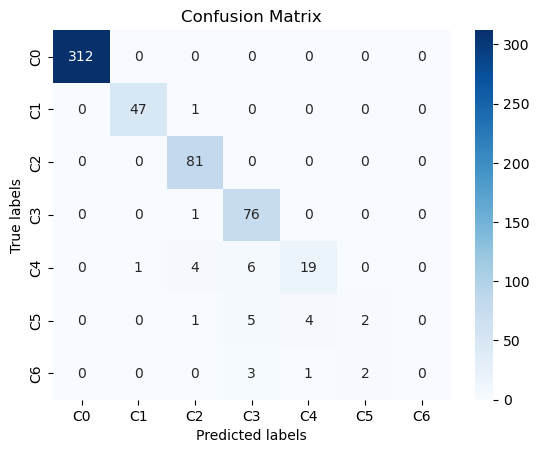

In [26]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
nacrtaj_matricu_konfuzije(y_test, yhat)

## Provera modela nad svim klasama

In [27]:
podaci_spec.columns

Index(['Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Cscore',
       'Impulsiveness', 'SS', 'Amphet', 'Amyl', 'Benzos', 'Canabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'VSA'],
      dtype='object')

In [28]:
atributi = []
for a in podaci_spec.columns:
    atributi.append(a)
    if(a == 'SS'):
        break
atributi

['Country',
 'Ethnicity',
 'Nscore',
 'Escore',
 'Oscore',
 'Cscore',
 'Impulsiveness',
 'SS']

In [29]:
klase = []
for k in podaci_spec.columns:
    if k in atributi:
        continue
    klase.append(k)
klase

['Amphet',
 'Amyl',
 'Benzos',
 'Canabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamin',
 'LegalH',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'VSA']

In [30]:
n = len(klase)
model = LogisticRegression()
preciznosti_1 = []
for i in range(n):
    y = podaci_spec[klase[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42) 
    for a in podaci_spec.columns:
        X_train[a] = skaliraj_podatke(X_train[a])
        X_test[a] = skaliraj_podatke(X_test[a])
        
    model.fit(X_train, y_train)
    ykapa = model.predict(X_test)
    acc = accuracy_score(y_test, ykapa)
    preciznosti_1.append(acc)

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [31]:
n = len(klase)
model = RidgeClassifier()
preciznosti_2 = []
for i in range(n):
    y = podaci_spec[klase[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42) 
    for a in podaci_spec.columns:
        X_train[a] = skaliraj_podatke(X_train[a])
        X_test[a] = skaliraj_podatke(X_test[a])
        
    model.fit(X_train, y_train)
    ykapa = model.predict(X_test)
    acc = accuracy_score(y_test, ykapa)
    preciznosti_2.append(acc)

In [32]:
n = len(klase)
model = SVC()
preciznosti_3 = []
for i in range(n):
    y = podaci_spec[klase[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42) 
    for a in podaci_spec.columns:
        X_train[a] = skaliraj_podatke(X_train[a])
        X_test[a] = skaliraj_podatke(X_test[a])
        
    model.fit(X_train, y_train)
    ykapa = model.predict(X_test)
    acc = accuracy_score(y_test, ykapa)
    preciznosti_3.append(acc)

In [33]:
n = len(klase)
model = RandomForestClassifier()
preciznosti_4 = []
for i in range(n):
    y = podaci_spec[klase[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42) 
    for a in podaci_spec.columns:
        X_train[a] = skaliraj_podatke(X_train[a])
        X_test[a] = skaliraj_podatke(X_test[a])
        
    model.fit(X_train, y_train)
    ykapa = model.predict(X_test)
    acc = accuracy_score(y_test, ykapa)
    preciznosti_4.append(acc)

In [34]:
imena_modela = ["LogistickaR", "Ridz", "SVM", "Random shume"]

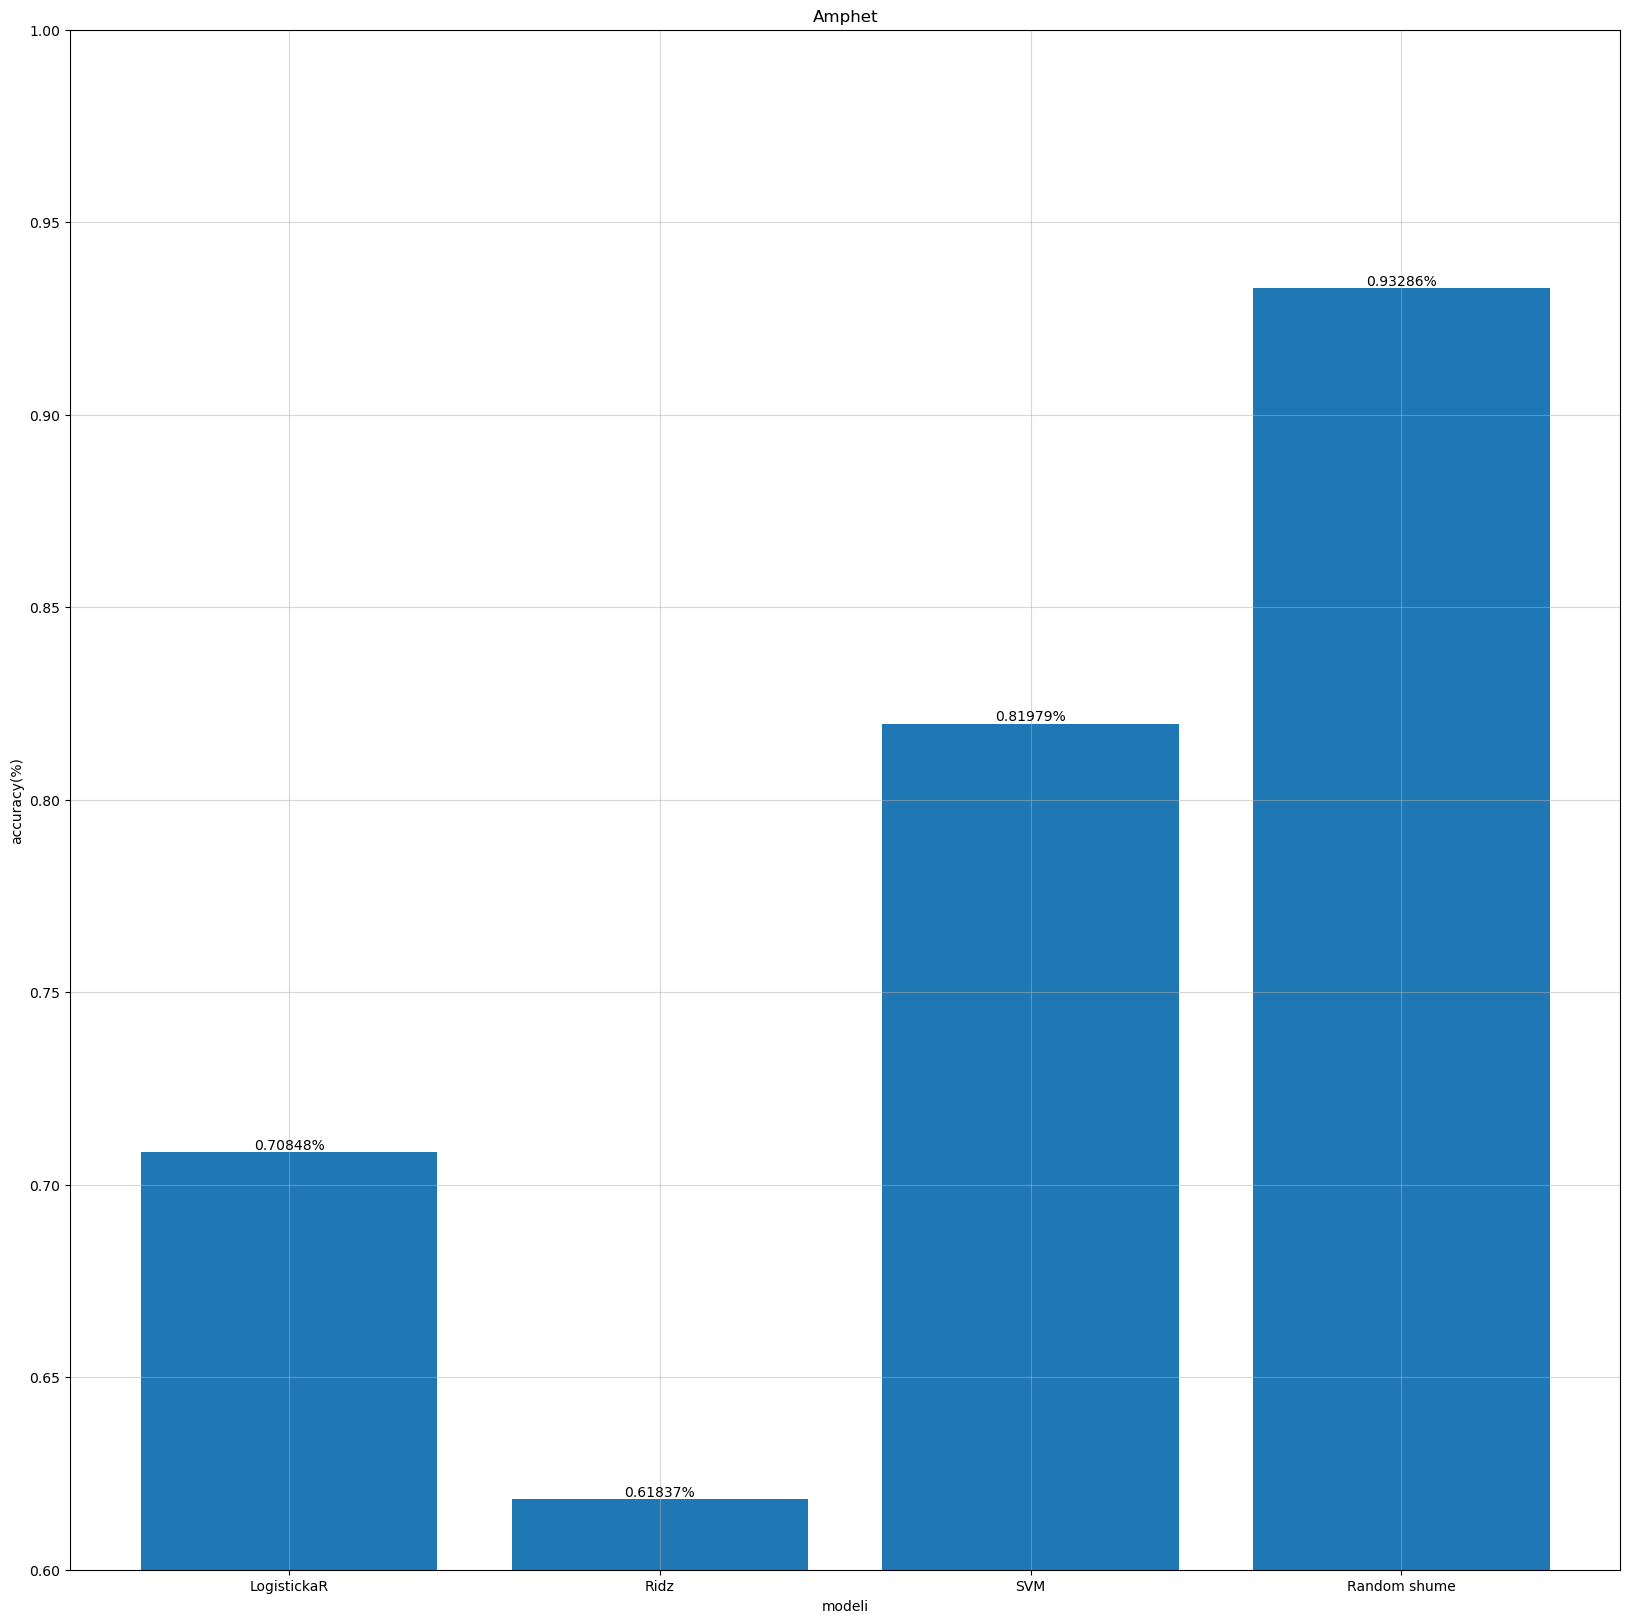

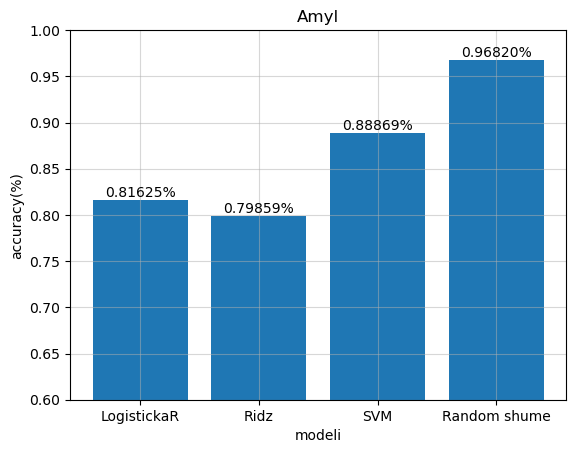

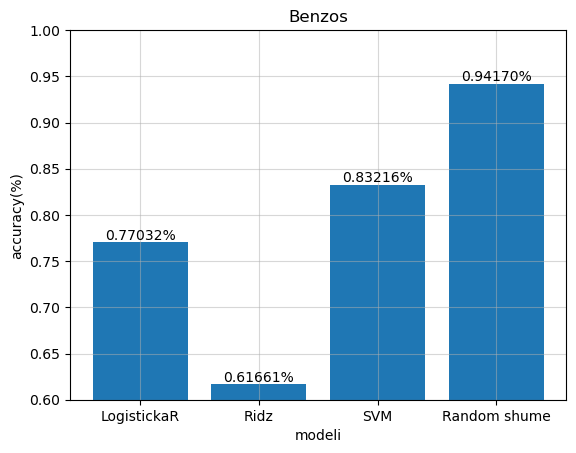

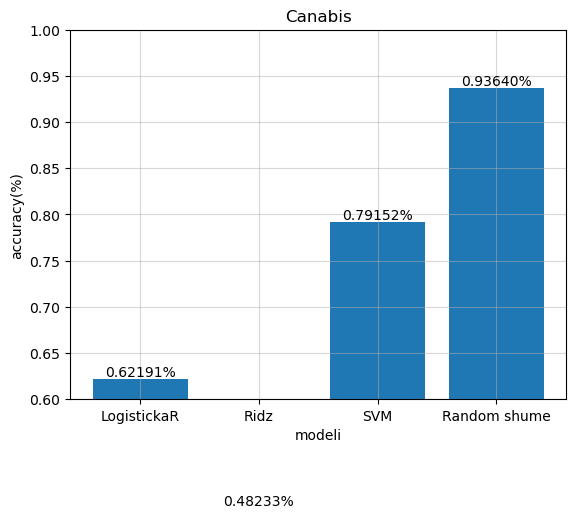

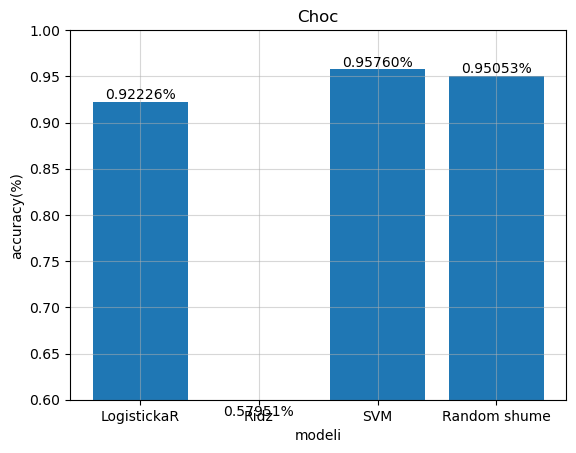

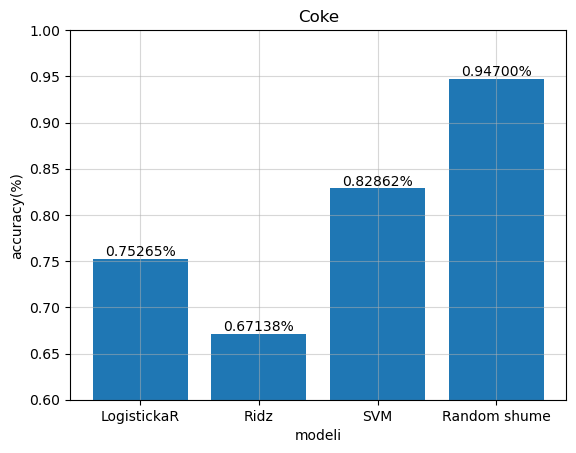

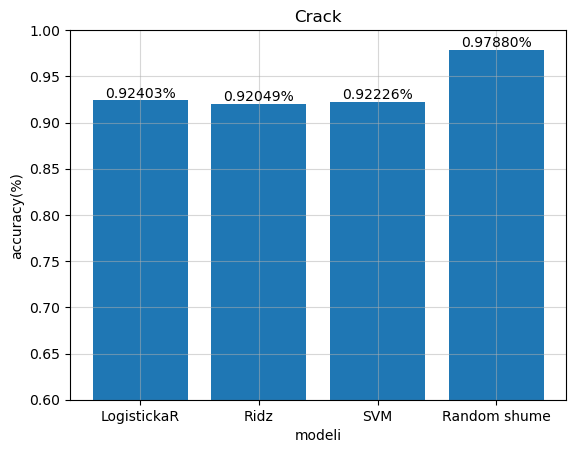

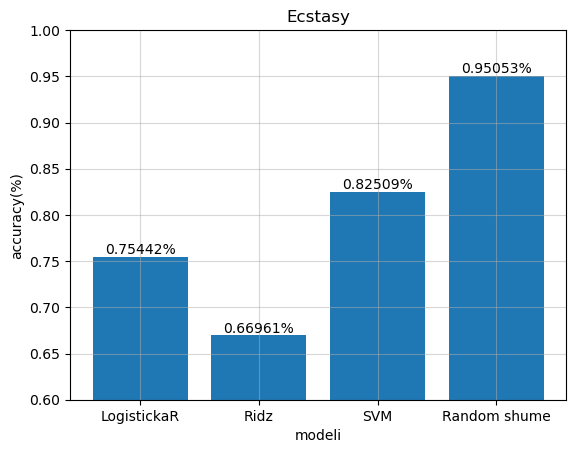

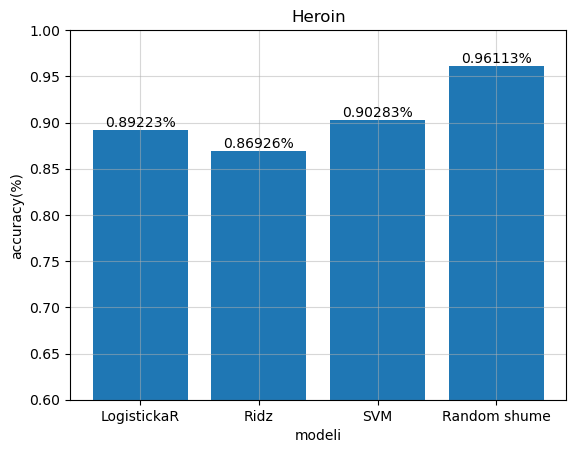

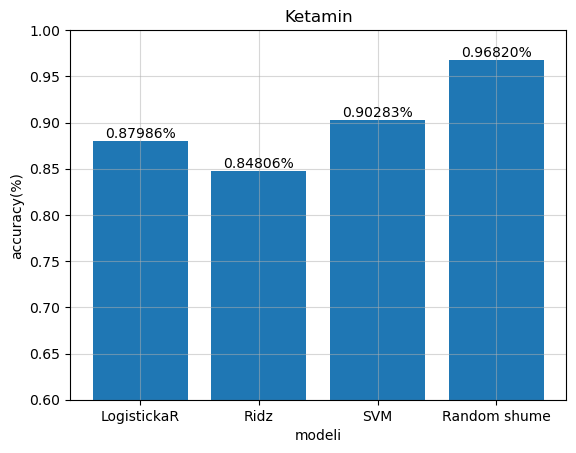

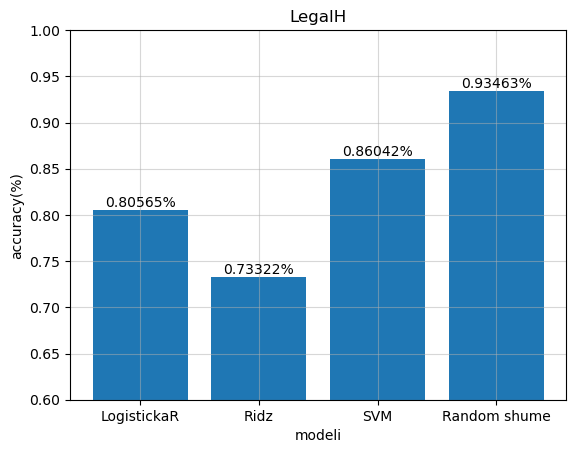

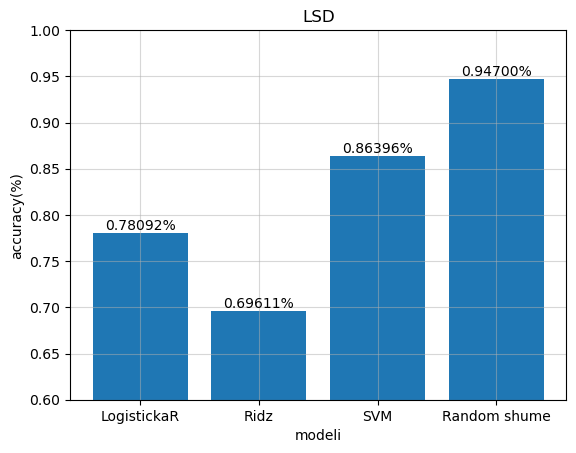

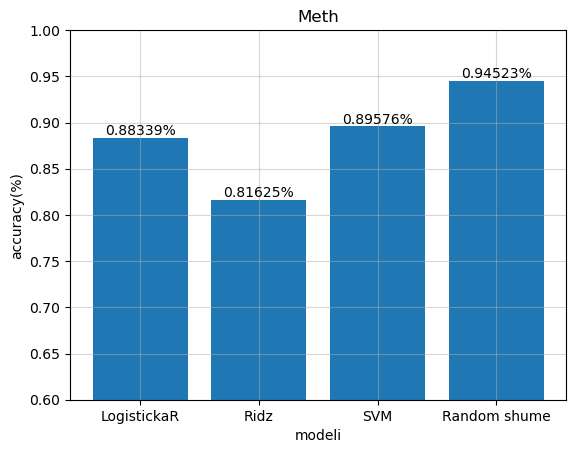

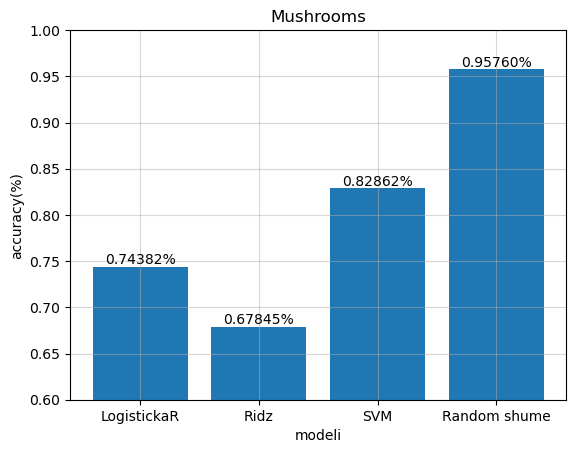

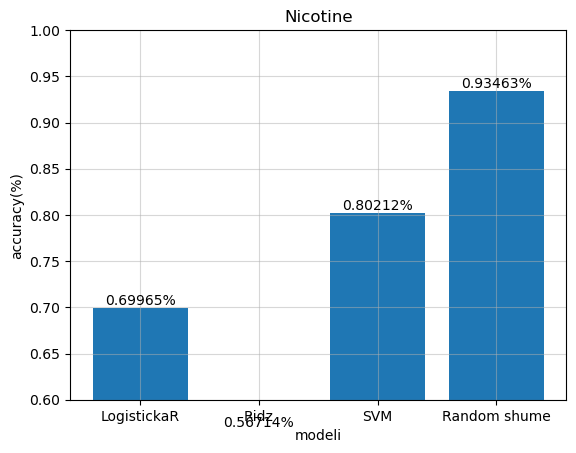

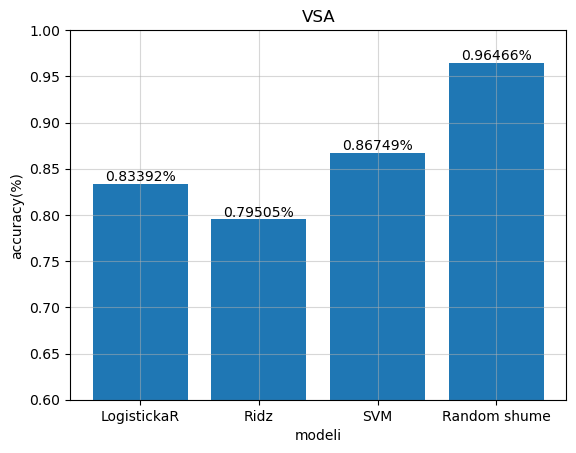

In [35]:
plt.figure(figsize = (20, 20))
for i in range(n):
    plt.title(f'{klase[i]}')
    vrednosti = [preciznosti_1[i], preciznosti_2[i], preciznosti_3[i], preciznosti_4[i]]
    plt.bar(imena_modela, vrednosti)
    plt.grid(alpha = 0.5)
    plt.ylim(0.6, 1.0)
    for j, s in enumerate(vrednosti):
        plt.text(imena_modela[j], s, f'{s:.5f}%', ha='center', va='bottom')
    plt.xlabel('modeli')
    plt.ylabel('accuracy(%)')
    plt.show()


In [36]:
def prosek(niz):
    return sum(niz) / len(niz)
proseci = [prosek(preciznosti_1), prosek(preciznosti_2), prosek(preciznosti_3), prosek(preciznosti_4)]

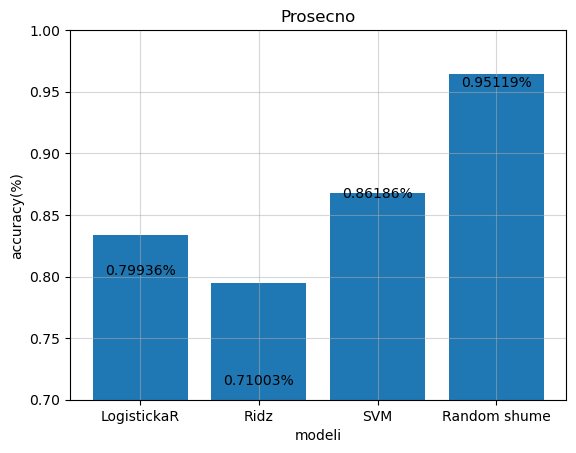

In [37]:
plt.title("Prosecno")
plt.bar(imena_modela, vrednosti)
plt.grid(alpha = 0.5)
plt.ylim(0.7, 1.0)
for j, s in enumerate(proseci):
    plt.text(imena_modela[j], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('modeli')
plt.ylabel('accuracy(%)')
plt.show()

In [38]:
#random sume ubedljivo najbolje
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
import joblib
joblib.dump(model, './Modeli/Forest.pkl')

['./Modeli/Forest.pkl']

In [40]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [41]:
import joblib 
joblib.dump(model, "./Modeli/SVM.pkl")

['./Modeli/SVM.pkl']